# Assignment 2 Playground

In [186]:
import pandas as pd
import urllib.request
import os
from skimage.color import rgb2hsv
from skimage.color import rgb2gray
from skimage import io
import numpy as np
import random

In [157]:
books_5_genres = pd.read_csv('2500_books_5_genres.csv')
genre_list = ['Fantasy', 'Romance', 'Crime', 'Horror', 'Science']
books_5_genres.head()

,Unnamed: 0,cover_id,title,author,year,genre,genre_alts
0,0,5579108,On the Nature of the Universe,Titus Lucretius Carus,NaN,Science,"['Translations into Italian', 'Accessible book..."
1,1,None,"[William Wheeler Hubbell, authorized to apply ...",United States. Congress. Senate. Committee on ...,NaN,Science,"['Floor coverings', 'Springs (Mechanism)', 'Wi..."
2,2,5788251,Moralia,Plutarch,NaN,Science,"['Philosophy, ancient', 'Translations into Ita..."
3,3,8236351,Essays,Francis Bacon,NaN,Science,"['Aphorisms and apothegms', 'English essays', ..."
4,4,8236442,Discours de la méthode,René Descartes,NaN,Science,"['Accessible book', 'Optique', 'Sciences', 'Me..."


In [214]:
metadata = sample_genres(genre_list, 250, books_5_genres, 'image')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
250
250


In [212]:
def sample_genres(list_of_genres, sample_size, df, folder):
    df = df.drop(df[df.cover_id == 'None'].index)
    sampled_df = pd.DataFrame()
    for genre in genre_list:
        sampled_df = pd.concat([df[df.genre == genre].sample(int(sample_size/5)), sampled_df])
#     print(len(df))
    download_images(sampled_df, folder)
    return sampled_df

In [18]:
# get pixel counts
def pixcount(painting): 
    return painting.shape[0] * painting.shape[1]

#get saturation
def mean_saturation(link):
    hsv_img = rgb2hsv(link)
    saturation_img = hsv_img[:,:, 1]
    satur = np.mean(saturation_img, axis=(0,1))
    return satur

#get hue
def mean_hue(link):
    hsv_img = rgb2hsv(link)
    hue_img = hsv_img[:, :, 0]
    return np.mean(hue_img, axis=(0,1))

#get brightness
def mean_brightness(link):
    hsv_img = rgb2hsv(link)
    value_img = hsv_img[:, :, 2]
    return np.mean(value_img)

#creates folder of the passed in param
def create_directory (folder):
   
    if not os.path.isdir(folder):
        os.makedirs(folder)
create_directory('image')

In [202]:
def download_images(meta_df, folder):
#     meta_df = meta_df.dropna()
#     if "Unnamed: 0" in meta_df.columns:
#         meta_df = meta_df.drop("Unnamed: 0", axis = 1)
    create_directory(folder)
    pix = []
    brightness = []
    hue = []
    saturation = []
    count = 0
    for coverid in meta_df['cover_id']:
#         count += 1
#         print(count)
        if coverid == 'None':
            continue
        link = "http://covers.openlibrary.org/b/id/{}-L.jpg".format(coverid)
        
        rendered_link = io.imread(link)
        
        pix.append(pixcount(rendered_link))
        print(len(pix))
        brightness.append(mean_brightness(rendered_link))
        hue.append(mean_hue(rendered_link))
        saturation.append(mean_saturation(rendered_link))
        
        filename = "{}/{}.jpg".format(folder,coverid)
        urllib.request.urlretrieve(link, filename)
#     print(len(pix))
    print(len(meta_df))
    meta_df['pixel_count'] = pix
    meta_df['mean_brightness'] = brightness
    meta_df['mean_hue'] = hue
    meta_df['mean_saturation'] = saturation

    return meta_df

In [216]:
metadata.head()

,Unnamed: 0,cover_id,title,author,year,genre,genre_alts,pixel_count,mean_brightness,mean_hue,mean_saturation
111,111,5037246,Selections,Jawaharlal Nehru,NaN,Science,"['Correspondence', 'Politics and government', ...",24064,0.809376,0.048985,0.417121
413,413,9300818,"Motion, Sound, and Heat",Isaac Asimov,NaN,Science,"['Science', 'Accessible book', 'Physics', 'Pro...",143500,0.755528,0.243541,0.463230
268,268,9243167,Introduction to the history of science,George Sarton,NaN,Science,"['Histoire', 'Science', 'Accessible book', 'Sc...",142000,0.807446,0.116844,0.173325
47,47,5493820,Rock-forming minerals,W. A. Deer,NaN,Science,"['Rock-forming minerals', 'Mineralogy', 'Scien...",23680,0.349693,0.482057,0.197143
499,499,7886767,"Surely You're Joking, Mr. Feynman!",Richard Phillips Feynman,NaN,Science,"['Humor', 'Anecdotes', 'Science', 'Accessible ...",78196,0.504256,0.502029,0.300883


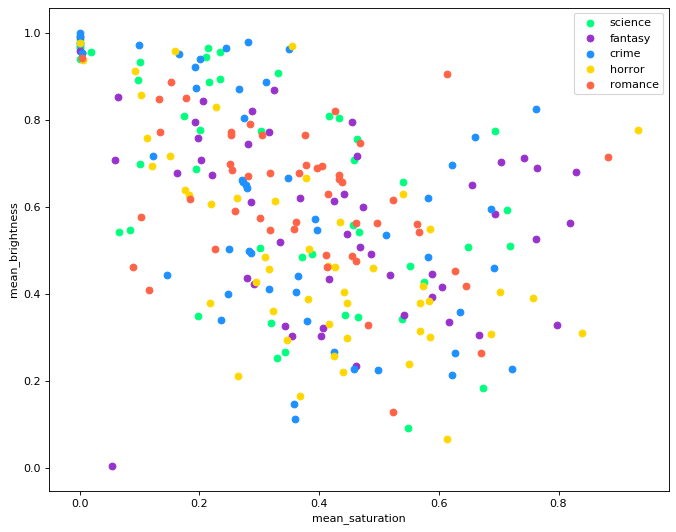

In [261]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
#fantasy romance crime horror science

science_saturation = metadata[metadata.genre == 'Science'].mean_saturation
fantasy_saturation = metadata[metadata.genre == 'Fantasy'].mean_saturation
crime_saturation = metadata[metadata.genre == 'Crime'].mean_saturation
horror_saturation = metadata[metadata.genre == 'Horror'].mean_saturation
romance_saturation = metadata[metadata.genre == 'Romance'].mean_saturation

science_brightness = metadata[metadata.genre == 'Science'].mean_brightness
fantasy_brightness = metadata[metadata.genre == 'Fantasy'].mean_brightness
crime_brightness = metadata[metadata.genre == 'Crime'].mean_brightness
horror_brightness = metadata[metadata.genre == 'Horror'].mean_brightness
romance_brightness = metadata[metadata.genre == 'Romance'].mean_brightness

bins = np.linspace(0, 1, 100)
plt.figure(figsize = (10,8), dpi = 80)
plt.legend((s, f, c, h, r), ('science', 'fantasy', 'crime', 'horror', 'romance'))
plt.xlabel('mean_saturation')
plt.ylabel('mean_brightness')


s = plt.scatter(science_saturation, science_brightness, color = 'springgreen')
f = plt.scatter(fantasy_saturation, fantasy_brightness, color = 'darkorchid')
c = plt.scatter(crime_saturation, crime_brightness, color = 'dodgerblue')
h = plt.scatter(horror_saturation, horror_brightness, color = 'gold')
r = plt.scatter(romance_saturation, romance_brightness, color = 'tomato')


# Histogram of saturation mean

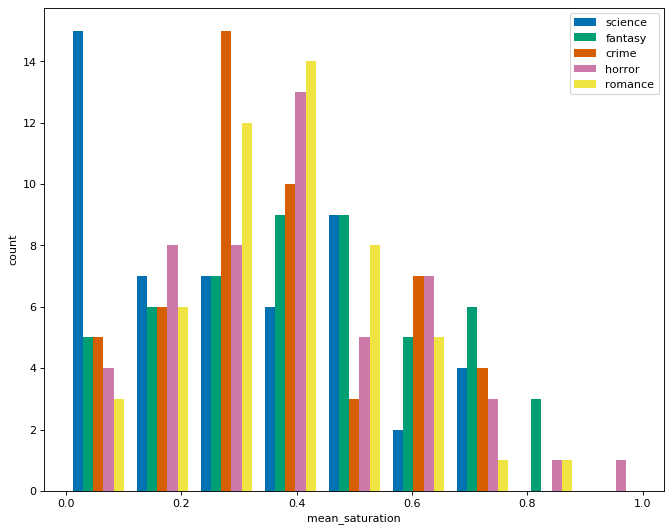

In [273]:
plt.style.use('seaborn-colorblind')

#fantasy romance crime horror science

# science_saturation = metadata[metadata.genre == 'Science'].mean_saturation
# fantasy_saturation = metadata[metadata.genre == 'Fantasy'].mean_saturation
# crime_saturation = metadata[metadata.genre == 'Crime'].mean_saturation
# horror_saturation = metadata[metadata.genre == 'Horror'].mean_saturation
# romance_saturation = metadata[metadata.genre == 'Romance'].mean_saturation
bins = np.linspace(0, 1, 10)
plt.figure(figsize = (10,8), dpi = 80)
plt.hist([science_saturation, fantasy_saturation,crime_saturation, horror_saturation, romance_saturation], 
         bins, label=['science', 'fantasy', 'crime','horror', 'romance'])
plt.legend(loc='upper right')
plt.xlabel('mean_saturation')
plt.ylabel('count')
plt.show()

# Histogram of brightness mean

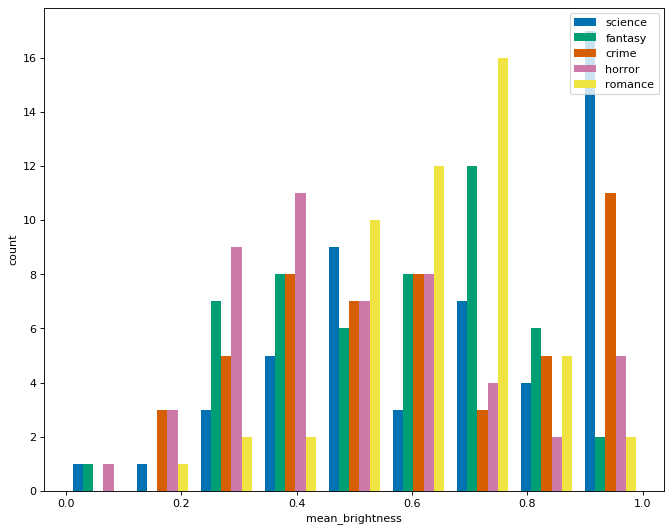

In [271]:
#fantasy romance crime horror science

bins = np.linspace(0, 1, 10)
plt.figure(figsize = (10,8), dpi = 80)
plt.hist([science_brightness, fantasy_brightness,crime_brightness, horror_brightness, romance_brightness], 
         bins, label=['science', 'fantasy', 'crime','horror', 'romance'])
plt.legend(loc='upper right')
plt.xlabel('mean_brightness')
plt.ylabel('count')
plt.show()

# Histogram of hue mean

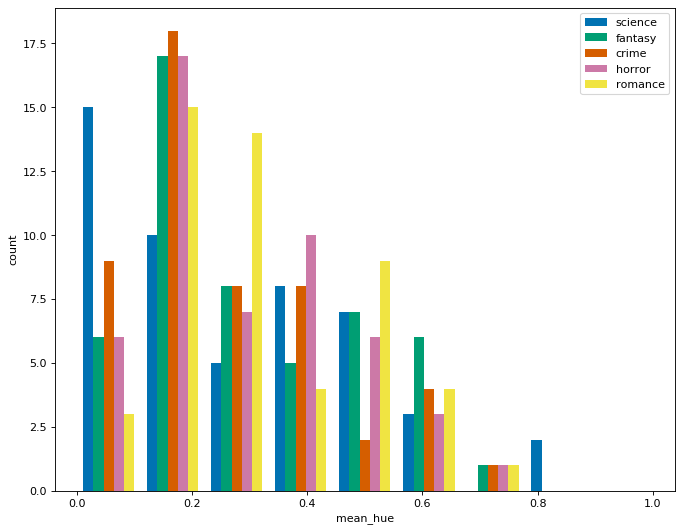

In [272]:

science_hue = metadata[metadata.genre == 'Science'].mean_hue
fantasy_hue = metadata[metadata.genre == 'Fantasy'].mean_hue
crime_hue = metadata[metadata.genre == 'Crime'].mean_hue
horror_hue = metadata[metadata.genre == 'Horror'].mean_hue
romance_hue = metadata[metadata.genre == 'Romance'].mean_hue

bins = np.linspace(0, 1, 10)
plt.figure(figsize = (10,8), dpi = 80)
plt.hist([science_hue, fantasy_hue,crime_hue, horror_hue, romance_hue], 
         bins, label=['science', 'fantasy', 'crime','horror', 'romance'])
plt.legend(loc='upper right')
plt.xlabel('mean_hue')
plt.ylabel('count')
plt.show()